In [1]:
# Code credit to Mikey Watson on the TwitterStock

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression

# reading the twitter csv file for their stock market prices
df = pd.read_csv('Twitter Stock Market Dataset.csv')

In [4]:
# look at the column names
for col in df.columns:
    print(f'{col} \n')

# show the size of the data that you are dealing with (row, col)
print(f'Shape of data: {df.shape}')


Date 

Open 

High 

Low 

Close 

Adj Close 

Volume 

Shape of data: (2264, 7)


In [5]:
# show the data type base on each column
for col in df.columns:
    print(f'{col}: {df[col].dtype} \n')

Date: object 

Open: float64 

High: float64 

Low: float64 

Close: float64 

Adj Close: float64 

Volume: float64 



In [6]:
# check for completeness in the data frame
for col in df.columns:
    print(f'Null values for {col}:{df[col].isna().sum()}')
    
# check at which rows in each column are null
for col in df.columns:
    print(df[df[col].isna() == True])


Null values for Date:0
Null values for Open:5
Null values for High:5
Null values for Low:5
Null values for Close:5
Null values for Adj Close:5
Null values for Volume:5
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []
            Date  Open  High  Low  Close  Adj Close  Volume
2259  2022-10-28   NaN   NaN  NaN    NaN        NaN     NaN
2260  2022-10-31   NaN   NaN  NaN    NaN        NaN     NaN
2261  2022-11-01   NaN   NaN  NaN    NaN        NaN     NaN
2262  2022-11-02   NaN   NaN  NaN    NaN        NaN     NaN
2263  2022-11-03   NaN   NaN  NaN    NaN        NaN     NaN
            Date  Open  High  Low  Close  Adj Close  Volume
2259  2022-10-28   NaN   NaN  NaN    NaN        NaN     NaN
2260  2022-10-31   NaN   NaN  NaN    NaN        NaN     NaN
2261  2022-11-01   NaN   NaN  NaN    NaN        NaN     NaN
2262  2022-11-02   NaN   NaN  NaN    NaN        NaN     NaN
2263  2022-11-03   NaN   NaN  NaN    NaN        NaN     NaN
            Date  Open  Hig

In [7]:
# drop the null rows in every feature without data loss
df.dropna(inplace=True)

# show that the null are removed
for col in df.columns:
    print(f'Null values for {col}: {df[col].isna().sum()}')

# look for uniqueness
print(df[df.duplicated()])

Null values for Date: 0
Null values for Open: 0
Null values for High: 0
Null values for Low: 0
Null values for Close: 0
Null values for Adj Close: 0
Null values for Volume: 0
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [8]:
print(df[:5])

         Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume  
0  117701670.0  
1   27925307.0  
2   16113941.0  
3    6316755.0  
4    8688325.0  


In [13]:
# making a copy to go back to if need to
old = df.copy()

In [17]:
# reading the twitter csv file for their stock market prices
df = pd.read_csv('Twitter Stock Market Dataset.csv')

# Feature enginnering/Augmentation
df['Up'] = df['Open'] > df['Close']

print(df[:5])

         Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume     Up  
0  117701670.0   True  
1   27925307.0   True  
2   16113941.0  False  
3    6316755.0   True  
4    8688325.0  False  


In [19]:
# define feature calc_per method - to help get the percentage
def calc_per(df):
    return np.divide(df['Open'], df['Close'])


# creating a new column in the data table
df['Percentage'] = df.apply(calc_per, axis='columns')

print(df[:5])


         Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume     Up  Percentage  
0  117701670.0   True    1.004454  
1   27925307.0   True    1.102761  
2   16113941.0  False    0.944056  
3    6316755.0   True    1.042005  
4    8688325.0  False    0.963146  


In [21]:
# Convert 'Date' column to a python datetime format and setting up the Year col as it own
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
for col in df.columns:
    print(f"{col}: {df[col].dtype} \n")
df['Year'] = df['Date'].apply(lambda x: x.year)

print(df[:5])

Date: datetime64[ns] 

Open: float64 

High: float64 

Low: float64 

Close: float64 

Adj Close: float64 

Volume: float64 

Up: bool 

Percentage: float64 

        Date       Open       High        Low      Close  Adj Close  \
0 2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1 2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2 2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3 2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4 2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume     Up  Percentage  Year  
0  117701670.0   True    1.004454  2013  
1   27925307.0   True    1.102761  2013  
2   16113941.0  False    0.944056  2013  
3    6316755.0   True    1.042005  2013  
4    8688325.0  False    0.963146  2013  


Text(0.5, 1.0, 'Mean Number of Shares Traded per Day by Year')

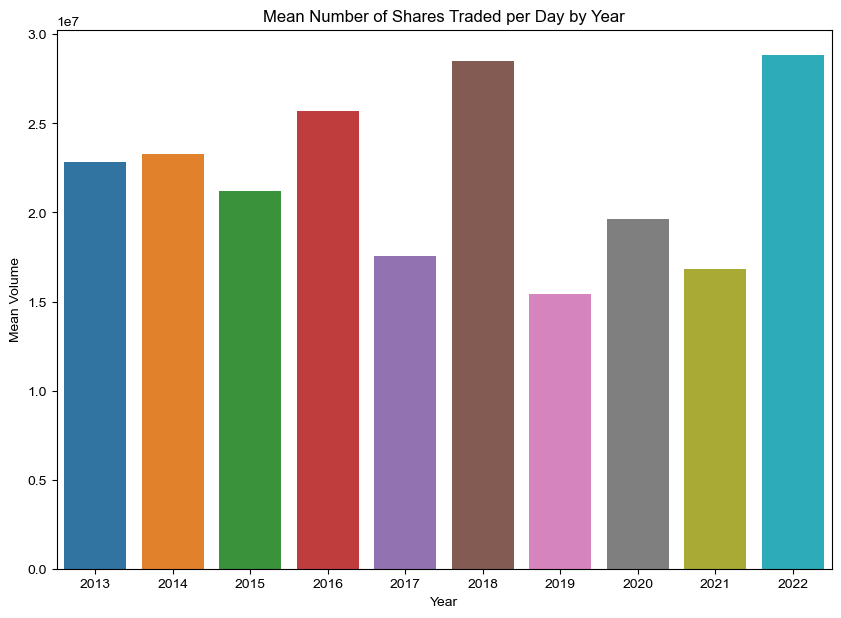

In [23]:
# Data Aggregations and Visualizations
data_by_year = df.groupby("Year")

volumes = data_by_year['Volume'].mean()
sd = data_by_year['Volume'].std()

plt.figure(figsize=(10, 7))
sns.barplot(x=volumes.index, y=volumes.values)
sns.set_style('darkgrid')
plt.xlabel('Year')
plt.ylabel('Mean Volume')
plt.title('Mean Number of Shares Traded per Day by Year')


Text(0.5, 1.0, 'Standard Deviation of Shares Traded per Day by Year')

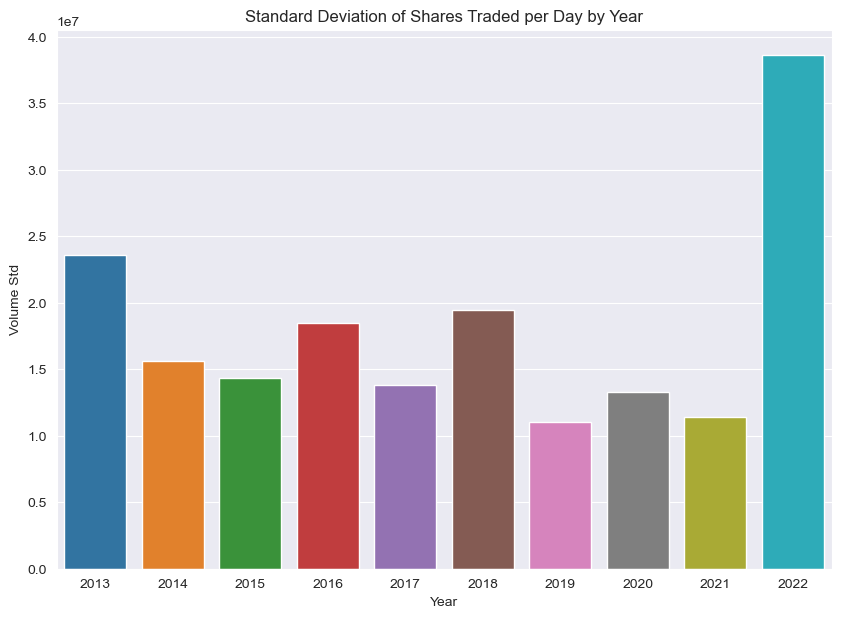

In [24]:
plt.figure(figsize=(10,7))
sns.barplot(x=sd.index, y=sd.values)
sns.set_style("darkgrid")
plt.xlabel("Year")
plt.ylabel("Volume Std")
plt.title("Standard Deviation of Shares Traded per Day by Year")

In [27]:
# creating a dictionary for the groups to be used in subplots
gp_dic = dict(list(data_by_year["Volume"]))
dates = []
for i in range(10):
    date = datetime(2013+i, 1, 1)

    # adds the dates 2013-2022 into the dates array to be used as titles
    dates.append(date.year)

print(dates)

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


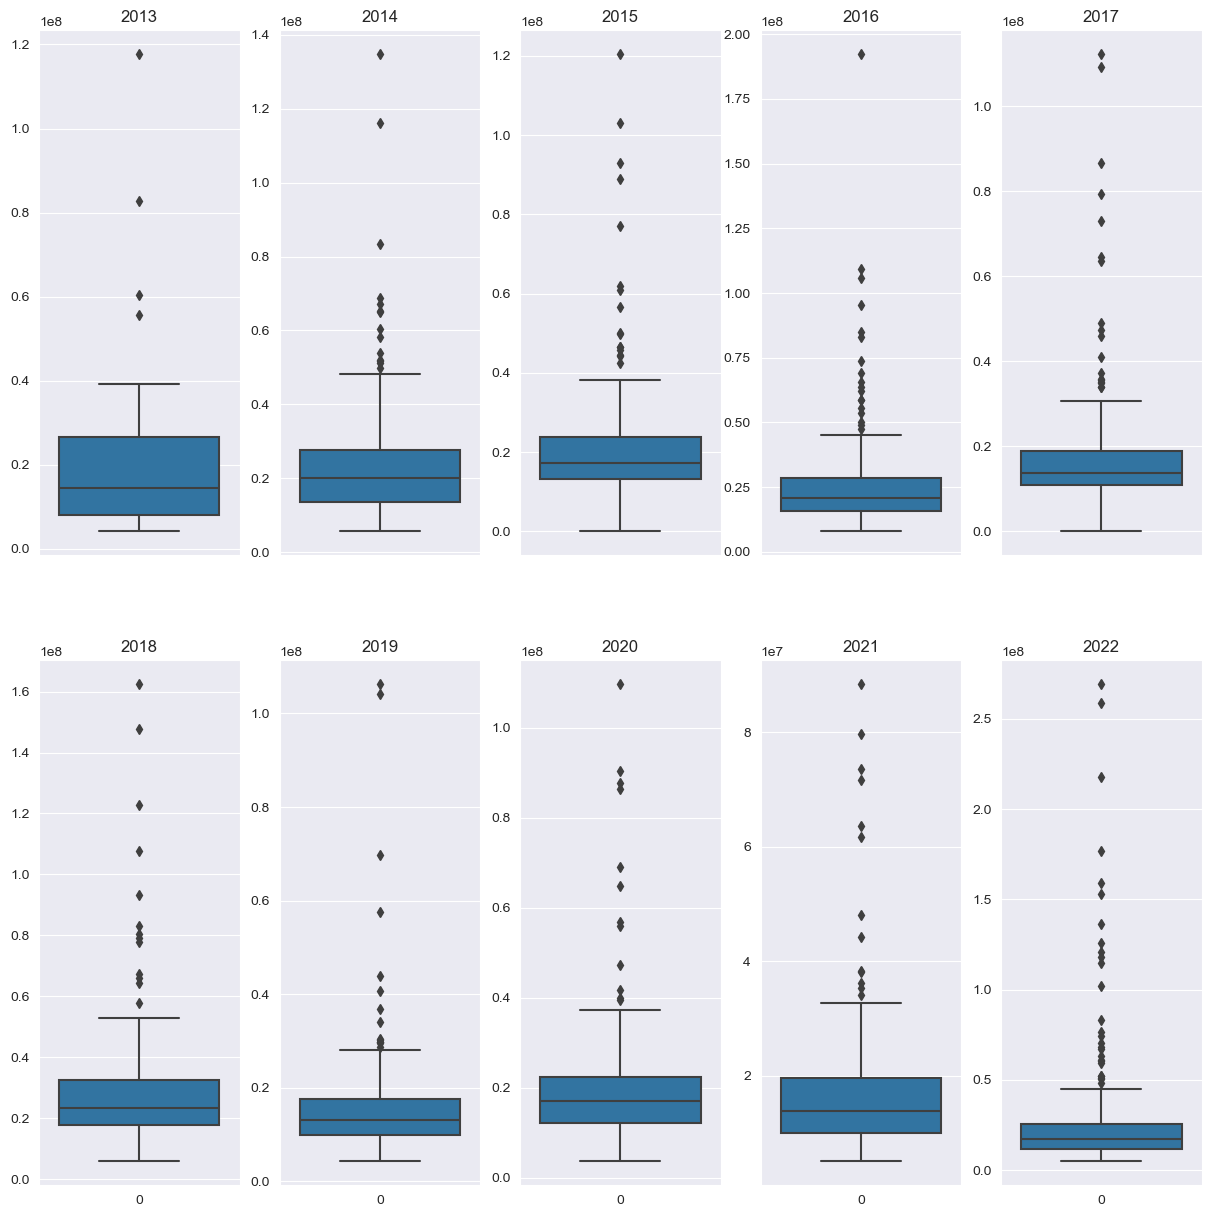

In [29]:
# boxplot of the distributions by year
fig, axes = plt.subplots(2, 5, sharex=True, figsize=(15, 15))
count = 0
for ax in axes:
    for year, axe in zip(dates[count:], ax):
        dt = gp_dic[year]
        count += 1
        sns.boxplot(np.array(dt), ax=axe)
        axe.set_title(year)

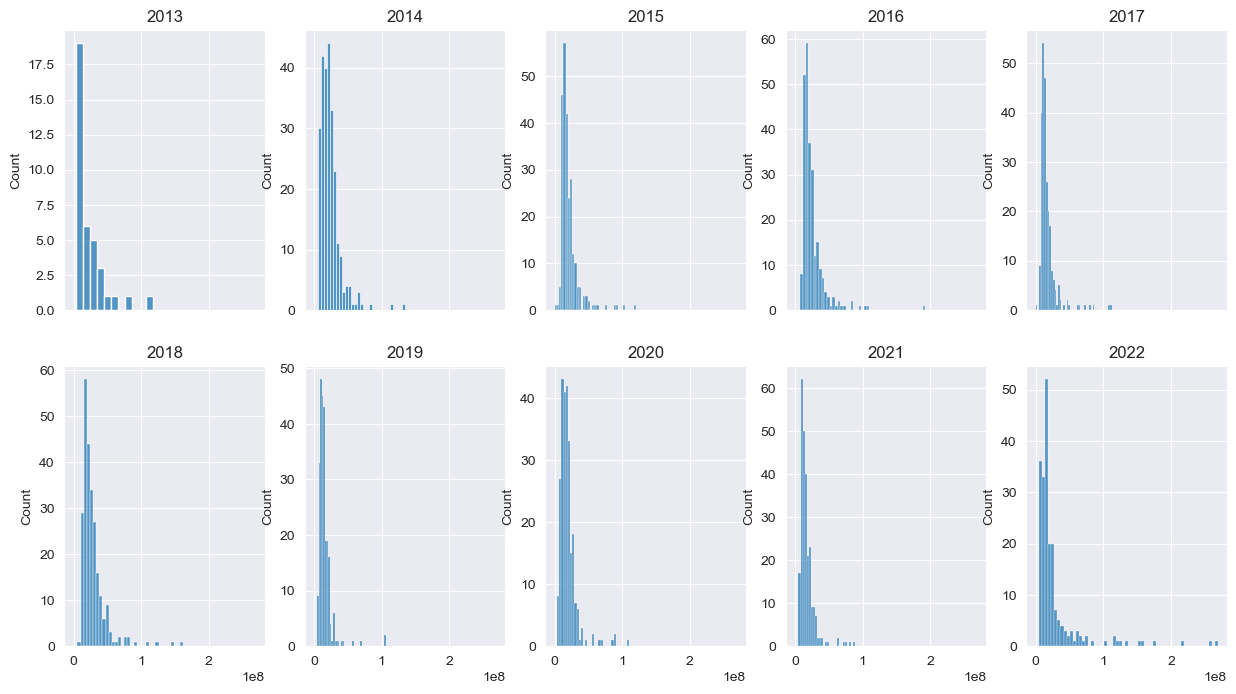

In [30]:
# histogram of the distribution by year
fig, axes = plt.subplots(2, 5, sharex=True, figsize=(15, 8))
count = 0
for ax in axes:
    for year, axe in zip(dates[count:], ax):
        dt = gp_dic[year]
        count += 1
        sns.histplot(np.array(dt), ax=axe)
        axe.set_title(year)

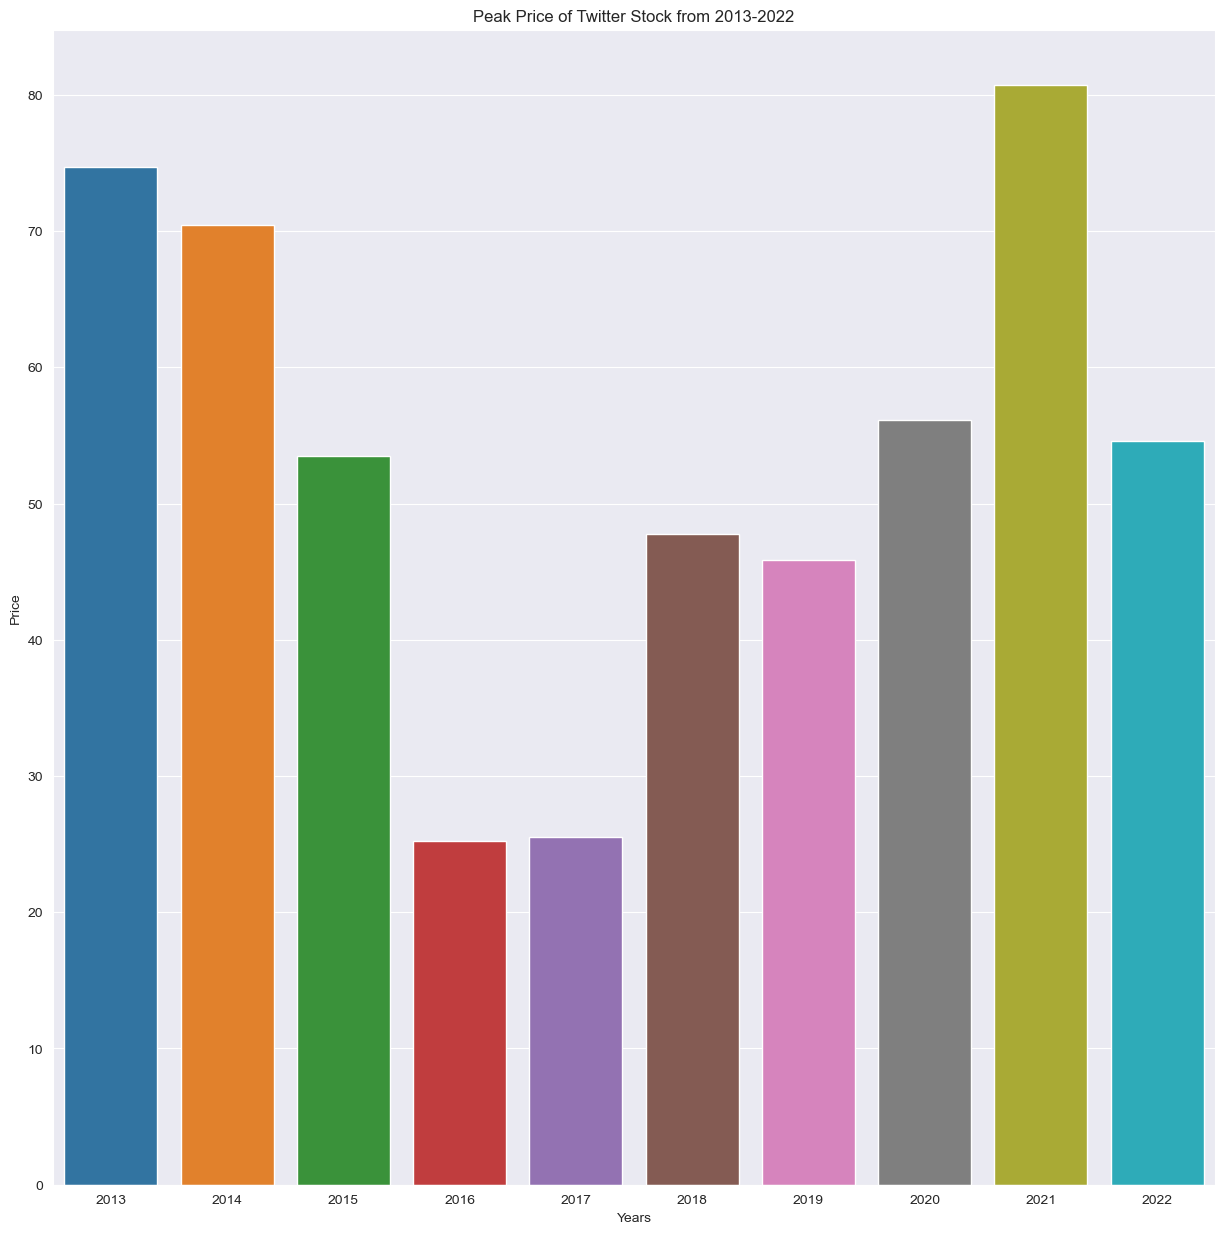

In [31]:
# looking at the peak value in each year
peaks = data_by_year["High"].max()
plt.figure(figsize=(15, 15))
sns.barplot(x=peaks.index, y=peaks.values)
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Peak Price of Twitter Stock from 2013-2022")
sns.set_style("whitegrid")

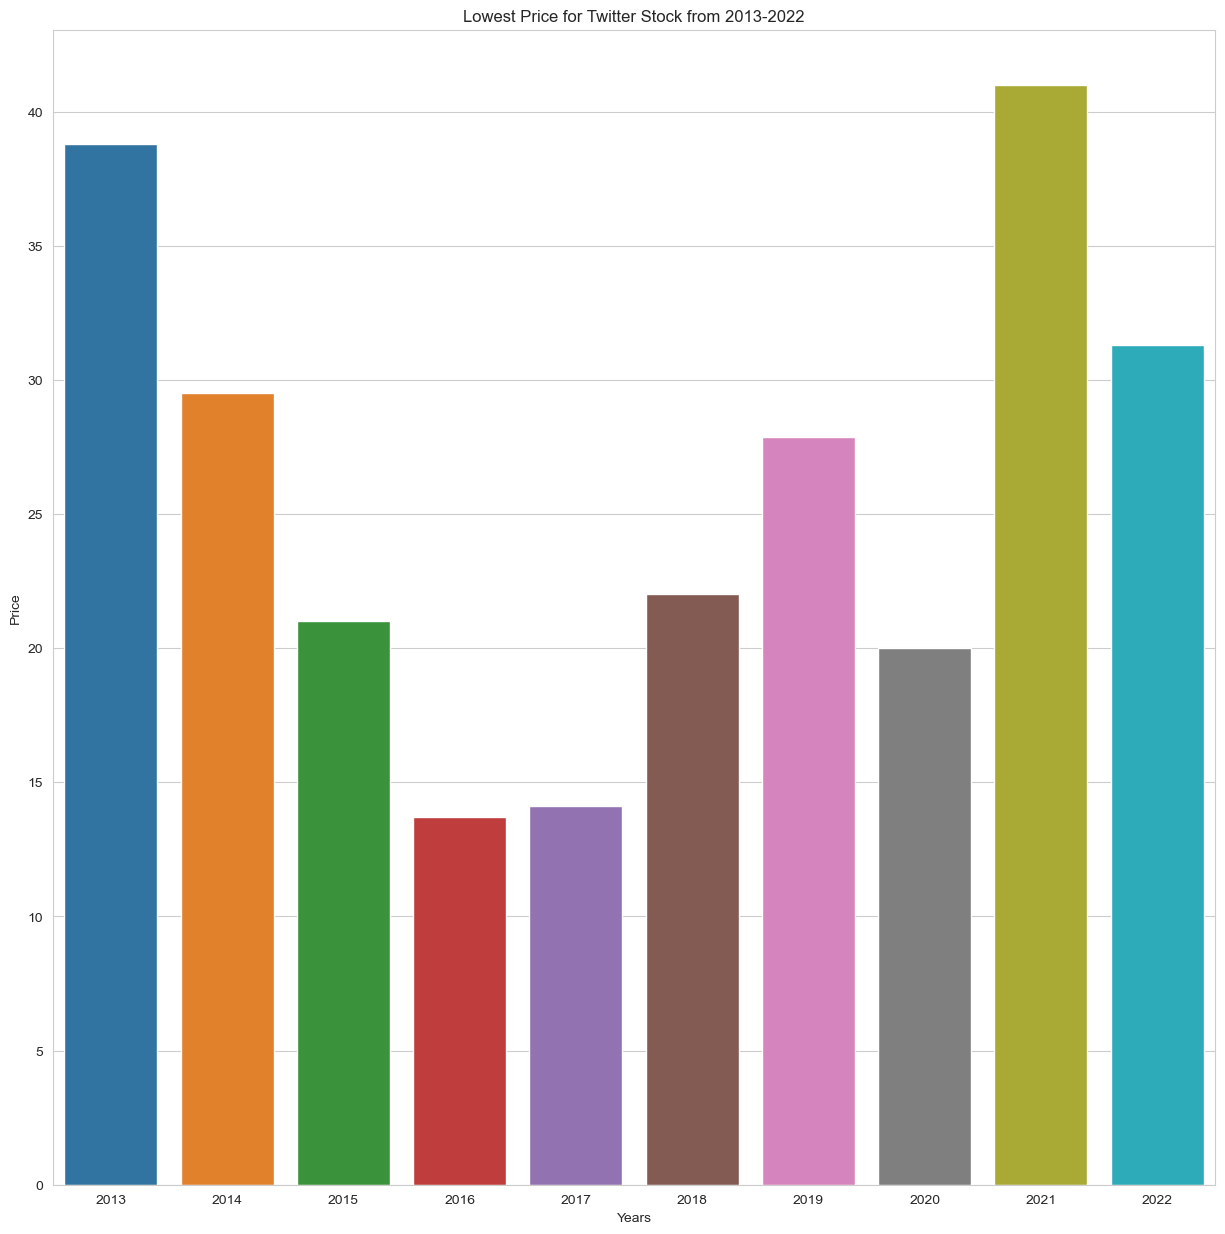

In [32]:
valleys = data_by_year["Low"].min()
plt.figure(figsize=(15,15))
sns.barplot(x=valleys.index, y=valleys.values)
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Lowest Price for Twitter Stock from 2013-2022")
sns.set_style("whitegrid")

In [34]:
# data preprocess for machine learning
print(df.head())

        Date       Open       High        Low      Close  Adj Close  \
0 2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1 2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2 2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3 2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4 2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume     Up  Percentage  Year  
0  117701670.0   True    1.004454  2013  
1   27925307.0   True    1.102761  2013  
2   16113941.0  False    0.944056  2013  
3    6316755.0   True    1.042005  2013  
4    8688325.0  False    0.963146  2013  


In [35]:
# converting true/false to 0/1 where 0 = true and 1 = false
df['Up'] = df['Up'].apply(lambda x: 1 if x==True else 0)
print(df.head())

        Date       Open       High        Low      Close  Adj Close  \
0 2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1 2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2 2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3 2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4 2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume  Up  Percentage  Year  
0  117701670.0   1    1.004454  2013  
1   27925307.0   1    1.102761  2013  
2   16113941.0   0    0.944056  2013  
3    6316755.0   1    1.042005  2013  
4    8688325.0   0    0.963146  2013  


In [36]:
# check for completeness in the data frame
for col in df.columns:
    print(f'Null values for {col}:{df[col].isna().sum()}')
    
# check at which rows in each column are null
for col in df.columns:
    print(df[df[col].isna() == True])

Null values for Date:0
Null values for Open:5
Null values for High:5
Null values for Low:5
Null values for Close:5
Null values for Adj Close:5
Null values for Volume:5
Null values for Up:0
Null values for Percentage:5
Null values for Year:0
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Up, Percentage, Year]
Index: []
           Date  Open  High  Low  Close  Adj Close  Volume  Up  Percentage  \
2259 2022-10-28   NaN   NaN  NaN    NaN        NaN     NaN   0         NaN   
2260 2022-10-31   NaN   NaN  NaN    NaN        NaN     NaN   0         NaN   
2261 2022-11-01   NaN   NaN  NaN    NaN        NaN     NaN   0         NaN   
2262 2022-11-02   NaN   NaN  NaN    NaN        NaN     NaN   0         NaN   
2263 2022-11-03   NaN   NaN  NaN    NaN        NaN     NaN   0         NaN   

      Year  
2259  2022  
2260  2022  
2261  2022  
2262  2022  
2263  2022  
           Date  Open  High  Low  Close  Adj Close  Volume  Up  Percentage  \
2259 2022-10-28   NaN   NaN

In [37]:
# drop the null rows in every feature without data loss
df.dropna(inplace=True)

# show that the null are removed
for col in df.columns:
    print(f'Null values for {col}: {df[col].isna().sum()}')

# look for uniqueness
print(df[df.duplicated()])

Null values for Date: 0
Null values for Open: 0
Null values for High: 0
Null values for Low: 0
Null values for Close: 0
Null values for Adj Close: 0
Null values for Volume: 0
Null values for Up: 0
Null values for Percentage: 0
Null values for Year: 0
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Up, Percentage, Year]
Index: []


In [38]:
# setting two different array x and y
y = np.array(df["Close"])
X = np.array(df.drop(["Date", "Close", "Adj Close"], axis="columns"))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (1694, 7)
y_train Shape: (1694,)
X_test Shape: (565, 7)
y_test Shape: (565,)


In [42]:
# Modelling and Evaluation
# looking at a linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9995665808099389

In [44]:
# do a cross validation to test the accuracy more thoroughly
cross_reg = LinearRegression()
kFold = KFold(n_splits=10, shuffle=True, random_state=0)
kfold_scores = cross_val_score(cross_reg, X, y, cv=kFold)
print(f"KFold Mean: {kfold_scores.mean()}")

shuffler = ShuffleSplit(test_size=.2, train_size=.8, n_splits=10)
shuffle_scores = cross_val_score(cross_reg, X, y, cv=shuffler)
print(f"\nShuffler mean: {shuffle_scores.mean()}")

KFold Mean: 0.9995738044987202

Shuffler mean: 0.9995823210653668


In [45]:
# Define Cross_validation function
def my_cross_val(reg, name, X, y):
    print("\n", name)
    cross_reg = reg
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    kfold_scores = cross_val_score(cross_reg, X, y, cv=kfold)
    print(f"KFold Mean: {kfold_scores.mean()}")

    shuffler = ShuffleSplit(test_size=.2, train_size=.8, n_splits=10)
    shuffle_scores = cross_val_score(cross_reg, X, y, cv=shuffler)
    print(f"\nShuffle Mean: {shuffle_scores.mean()}")

    return [kfold_scores.mean(), shuffle_scores.mean()]

In [54]:
# different model that will be use
gbr = GradientBoostingRegressor()
svr = SVR()
random_forest = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()

models = [gbr, svr, random_forest, ridge, lasso]
names = ["Gradient Boosting", "SVM", "Random Forest", "Ridge", "Lasso"]

In [58]:
# compares all model's accuracy scores and decides the best
name_index = 0
best = gbr
best_scores = [0,0]
for mod in models:
    scores = my_cross_val(mod, names[name_index], X, y)
    if scores[0] > best_scores[0] and scores[1] > best_scores[1]:
        best_scores = scores
        best = mod

    name_index += 1

print("\nThe best Model: ", best)
print("with scores: ", best_scores)


 Gradient Boosting
KFold Mean: 0.9992566853240511

Shuffle Mean: 0.9991788889729726

 SVM
KFold Mean: 0.014168898550364262

Shuffle Mean: 0.015001389622426331

 Random Forest
KFold Mean: 0.9991681572797362

Shuffle Mean: 0.9991044456323973

 Ridge
KFold Mean: 0.9993197278190481

Shuffle Mean: 0.9992867933453438

 Lasso
KFold Mean: 0.9983834117528543

Shuffle Mean: 0.9984518261621892

The best Model:  Ridge()
with scores:  [0.9993197278190481, 0.9992867933453438]


C:\Users\nengm\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.51433e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nengm\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.63626e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nengm\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.56961e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nengm\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.61675e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nengm\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

In [60]:
# Trying out the Kaggle data souces
# testing other data source from Kaggle for the model to be tested on
new_data1 = pd.read_csv("Twatter.csv")
new_data2 = pd.read_csv("twitter-stocks.csv")

#recall the coply 'old'
copy1 = old.copy()
copy2 = old.copy()

In [73]:
def is_same(new_data, old):
    new_data["Date"] = new_data["Date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
    old["Date"] = old["Date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
    new_data = new_data.set_index("Date")
    old = old.set_index("Date")
    for index in new_data.index:
        if index in old.index:
            new_data.drop([index], axis="rows", inplace=True)

    if len(new_data) == 0:
        return True
    else:
        return False

In [75]:
print("True/False: the newdata1 is the same ==> ", is_same(new_data1, copy1))
print("True/False: the newdata2 is the same ==> ", is_same(new_data2, copy2))

True/False: the newdata1 is the same ==>  True
True/False: the newdata2 is the same ==>  True


In [77]:
# getting the error precentage from the MSE & MAE
model = best
model.fit(X_train, y_train)

C:\Users\nengm\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.77805e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [79]:
# get the model predictions
preds = model.predict(X_test)

In [83]:
# calculation of the MSE & MAE
print(f"MSE: {mean_squared_error(y_test, preds) * 100}")
print(f"MAE: {mean_absolute_error(y_test, preds) * 100}")

MSE: 12.204863642373493
MAE: 25.1615602959462
